<a href="https://colab.research.google.com/github/MouliChintakunta-AI/DLTutors/blob/main/FinalVersionBackpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook

In [8]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("Rainbow",colors=["blue","red",'orange','green','yellow'])

In [24]:
data,labels = make_blobs(n_features=9,n_samples=1000,centers=5,random_state=0)

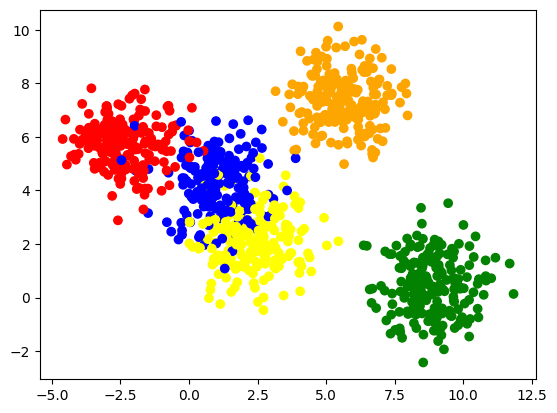

In [25]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify = labels,random_state= 0)

In [18]:
lb = LabelBinarizer()
Y_train_oh = lb.fit_transform(Y_train)

In [19]:
np.random.seed(0)

In [38]:
class VBackpropagation:
  def __init__(self,n_inputs,n_outputs,hidden=[2]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden)
    self.sizes = [self.nx] + hidden + [self.ny] # [ 9 2 5]
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      self.B[i+1] = np.zeros((1,self.sizes[i+1]))

  def sigmoid(self,X):
    return 1.0 / (1.0 + np.exp(-X))

  def grad_sigmoid(self,X):
    return X*(1-X)

  def softmax(self,X):
    exp = np.exp(X)
    return exp/np.sum(exp,1).reshape(-1,1)

  def forward_pass(self,X):
    self.A = {}
    self.H = {}
    self.H[0] = X
    for i in range(self.nh+1): #[]
      self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
      if self.ny == 1 or i < self.nh:
        self.H[i+1] = self.sigmoid(self.A[i+1])
      else:
        self.H[i+1] = self.softmax(self.A[i+1])
    return self.H[self.nh+1]

  def grad(self,X,Y):
    self.forward_pass(X)
    self.dH = {}
    self.dA = {}
    self.dW = {}
    self.dB = {}
    L = self.nh+1
    self.dA[L] = self.H[L] - Y
    for k in range(L,0,-1):
      self.dW[k] = np.matmul(self.H[k-1].T,self.dA[k])
      self.dB[k] = np.sum(self.dA[k],0).reshape(1,-1)
      self.dH[k-1] = np.matmul(self.dA[k],self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1],self.grad_sigmoid(self.H[k-1]))

  def fit(self,X,Y,learning_rate = 0.2,epochs = 2000,display_loss =True):
    if display_loss:
      loss = {}
    for epoch in tqdm_notebook(range(epochs),desc = "Training FFN" , unit= "Epoch"):
      self.grad(X,Y)
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (self.dW[i+1]/m)
        self.B[i+1] -= learning_rate * (self.dB[i+1]/m)
      if display_loss:
        y_pred = self.predict(X)
        loss[epoch] = log_loss(Y,y_pred)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Log-Loss")
      plt.show()

  def predict(self,X):
    y_pred = self.forward_pass(X)
    return y_pred.squeeze()

In [39]:
np.exp([1,2,4,6])/np.sum([[1,2,4,6],[3,4,1,1],[3,5,8,2]],1).reshape(-1,1)

array([[ 0.2090986 ,  0.56838893,  4.19985769, 31.03298411],
       [ 0.30203131,  0.82100623,  6.06646111, 44.8254215 ],
       [ 0.15101566,  0.41050312,  3.03323056, 22.41271075]])

<ipython-input-38-8c4088e08b85>:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN" , unit= "Epoch"):


Training FFN:   0%|          | 0/2000 [00:00<?, ?Epoch/s]

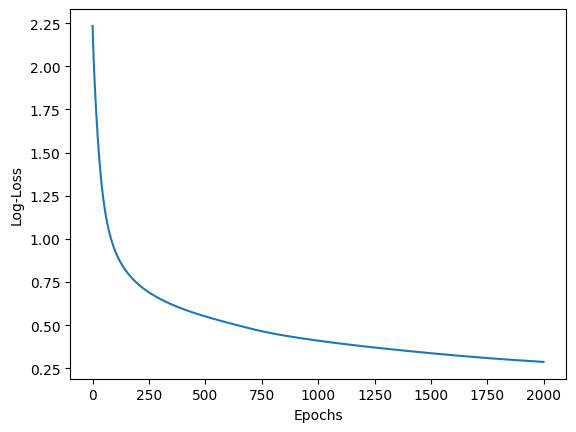

In [41]:
model = VBackpropagation(n_inputs = X_train.shape[1],n_outputs = Y_train_oh.shape[1],hidden= [9])
model.fit(X_train,Y_train_oh,epochs = 3000,learning_rate=.06)

In [55]:
y_train_pred = model.predict(X_train)
Y_train_pred = np.argmax(y_train_pred,1)
print("Training Accuracy:",accuracy_score(Y_train,Y_train_pred))

y_test_pred = model.predict(X_test)
Y_test_pred = np.argmax(y_test_pred,1)
print("Test Accuracy:",accuracy_score(Y_test,Y_test_pred))

Training Accuracy: 0.912
Test Accuracy: 0.928


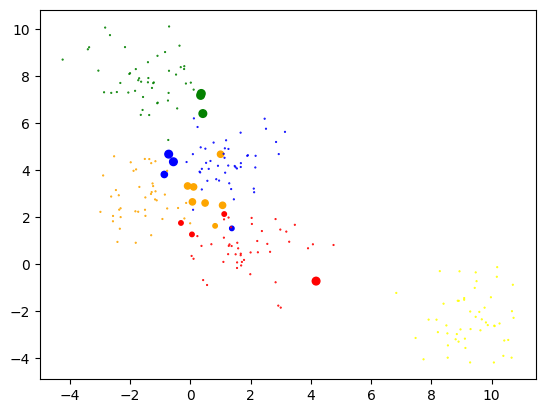

In [56]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap=my_cmap,s= 10 * np.abs(Y_test - Y_test_pred) + .3 )

<ipython-input-38-8c4088e08b85>:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),desc = "Training FFN" , unit= "Epoch"):


Training FFN:   0%|          | 0/3000 [00:00<?, ?Epoch/s]

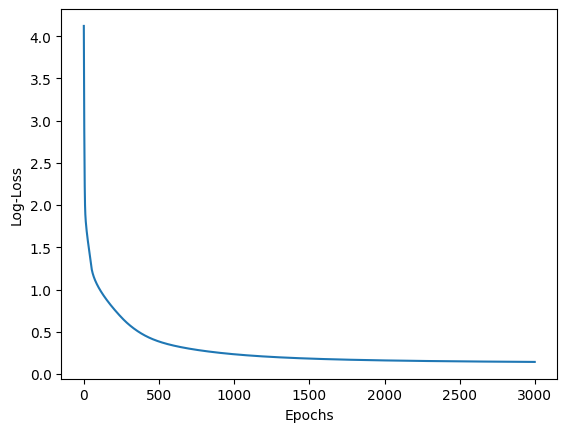

Training Accuracy: 0.9466666666666667
Test Accuracy: 0.952


In [53]:
model1 = VBackpropagation(n_inputs = X_train.shape[1],n_outputs = Y_train_oh.shape[1],hidden= [9,16,32])
model1.fit(X_train,Y_train_oh,epochs = 3000,learning_rate=.09)

y_train_pred = model1.predict(X_train)
Y_train_pred = np.argmax(y_train_pred,1)
print("Training Accuracy:",accuracy_score(Y_train,Y_train_pred))

y_test_pred = model1.predict(X_test)
Y_test_pred = np.argmax(y_test_pred,1)
print("Test Accuracy:",accuracy_score(Y_test,Y_test_pred))

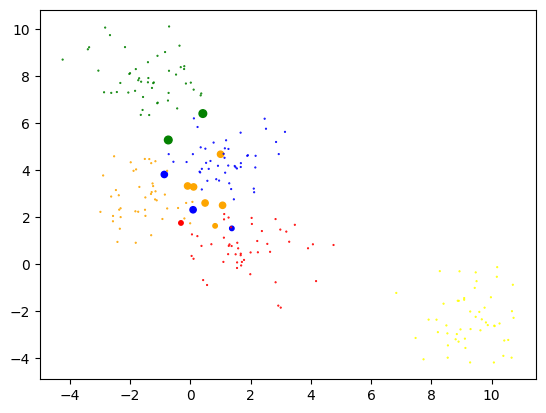

In [54]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap=my_cmap,s= 10 * np.abs(Y_test - Y_test_pred) + .3 )